In [2]:
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import ttest_rel, wilcoxon

In [3]:
boundaries_ndvi = gpd.read_file("../Data/GRASS_Boundaries_NDVI.gpkg")
subdivisions_ndvi = gpd.read_file("../Data/GRASS_Subdivisions_NDVI.gpkg")

In [3]:
boundaries_long = boundaries_ndvi.melt(
    id_vars = ['Association_ID', 'GrazingUnit_ID'],
    value_vars = [c for c in boundaries_ndvi.columns if c.startswith('ndvi_')],
    var_name = 'year',
    value_name = 'NDVI'
)

boundaries_long['year'] = boundaries_long['year'].str.replace('ndvi_','').astype(int)
boundaries_long['Association_GrazingUnit'] = (
    boundaries_long['Association_ID'].astype(str)
    + ' | '
    + boundaries_long['GrazingUnit_ID'].astype(str)
)

In [4]:
boundaries_ndvi['Start_Year'].value_counts()

Start_Year
2023    63
2024    44
2022    36
2021    15
2025     7
Name: count, dtype: int64

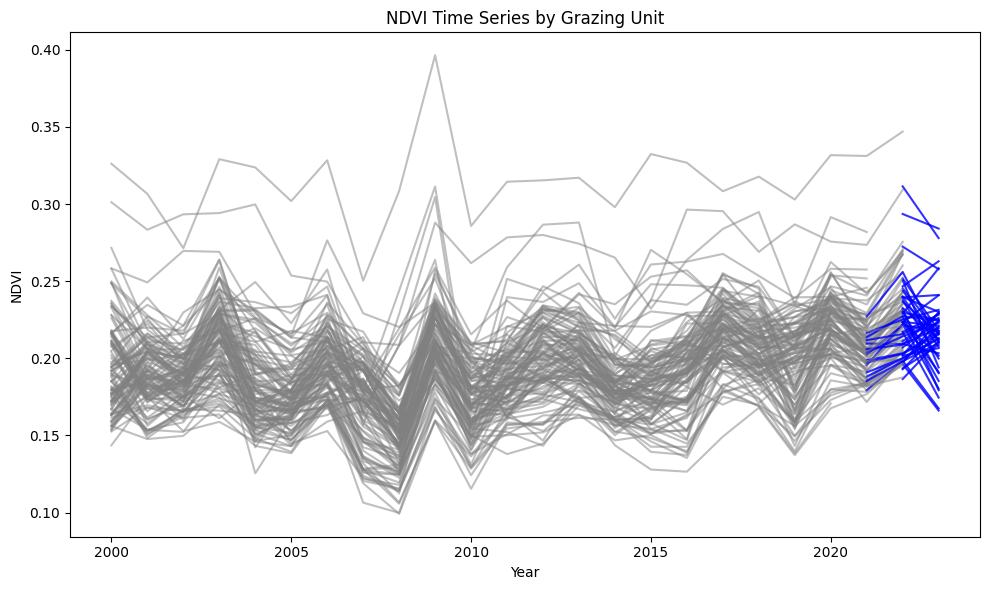

In [12]:
df = boundaries_ndvi
ndvi_cols = [col for col in df.columns if col.startswith('ndvi_')]
years = [int(col.split('_')[1]) for col in ndvi_cols]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    ndvi_values = row[ndvi_cols].values
    start_year = int(row['Start_Year'])
    
    # Find index in the year list where Start_Year begins
    if start_year in years:
        start_idx = years.index(start_year)
    else:
        continue  # skip rows with invalid start year
    
    # Plot before start year in gray
    ax.plot(years[:start_idx], ndvi_values[:start_idx], color='gray', alpha=0.5)

    # Plot from start year onward in blue
    ax.plot(years[start_idx:], ndvi_values[start_idx:], color='blue', alpha=0.8)

ax.set_xlabel('Year')
ax.set_ylabel('NDVI')
ax.set_title('NDVI Time Series by Grazing Unit')
plt.tight_layout()
plt.show()

In [6]:
fig = px.line(
    boundaries_long,
    x='year',
    y='NDVI',
    color='Association_ID',
    markers=True,
    title='Annual Mean NDVI by Boundary'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Mean NDVI',
    legend_title='Site'
)
fig.show()